# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# This code will include a brief description of the outputs from the code for the matplotlib challenge.
# Most of this was heavily inspired by TA Drew's speedrun.
# For more information about how the code functions, check the README file.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_mouse_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
full_mouse_df

# Should combine CSV files into one table via the Mouse ID found in both files.

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice.
len(full_mouse_df["Mouse ID"].unique())

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = full_mouse_df[full_mouse_df.duplicated(subset = ["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_dataset = full_mouse_df[full_mouse_df["Mouse ID"] == 'g989']
duplicate_mouse_dataset

# Same mouse ID, different time points

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dupes_df = full_mouse_df[full_mouse_df["Mouse ID"].isin(duplicate_mouse_ids) == False]
no_dupes_df

# Same table as first without duplicate information about mouse g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [15]:
# Checking the number of mice in the clean DataFrame.
len(no_dupes_df["Mouse ID"].unique())

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
means = no_dupes_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
medians = no_dupes_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variances = no_dupes_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_deviations = no_dupes_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sems = no_dupes_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({
    "Mean Tumor Volume (mm3)": means,
    "Median Tumor Volume (mm3)": medians,
    "Tumor Volume Variances": variances,
    "Tumor Volume Standard Deviations": standard_deviations,
    "Tumor Volume Standard Errors": sems
})
summary_stats

# Two different methods to create the table with given specifications as above.

C:\Users\josep\AppData\Local\Temp\ipykernel_13452\3336082437.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = no_dupes_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
C:\Users\josep\AppData\Local\Temp\ipykernel_13452\3336082437.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = no_dupes_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
C:\Users\josep\AppData\Local\Temp\ipykernel_13452\3336082437.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_o

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variances,Tumor Volume Standard Deviations,Tumor Volume Standard Errors
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
stats_aggregated = no_dupes_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
stats_aggregated

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

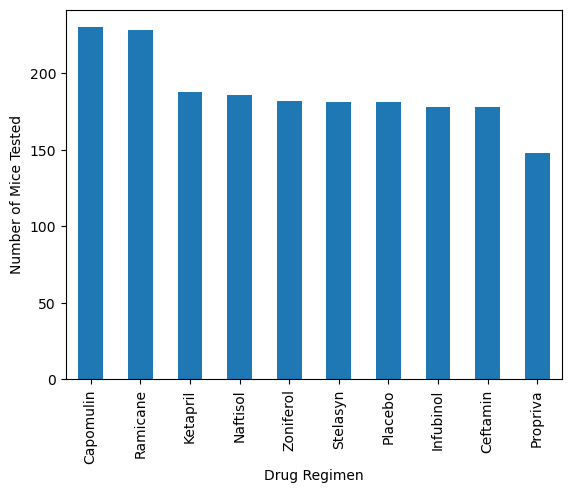

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

tests = no_dupes_df["Drug Regimen"].value_counts()
tests.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

# Two different ways to produce the bar plot based on data used in the previous table.

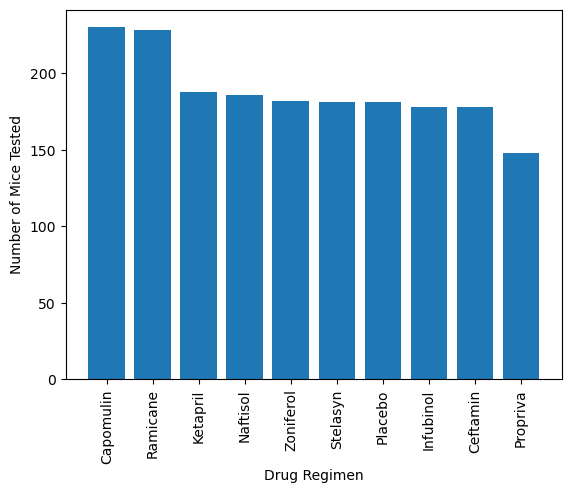

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
tests = no_dupes_df["Drug Regimen"].value_counts()
plt.bar(tests.index.values, tests.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

<Axes: ylabel='Sex'>

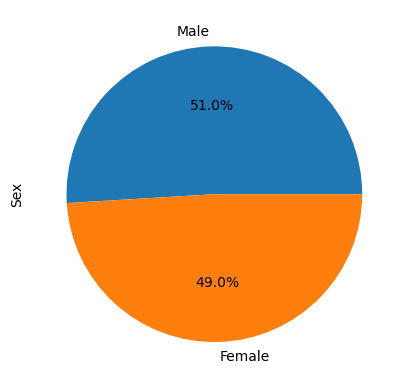

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = no_dupes_df.Sex.value_counts()
gender.plot(kind="pie", autopct="%1.1f%%")

# Two different ways to produce the pie plot based on data used in the previous table.

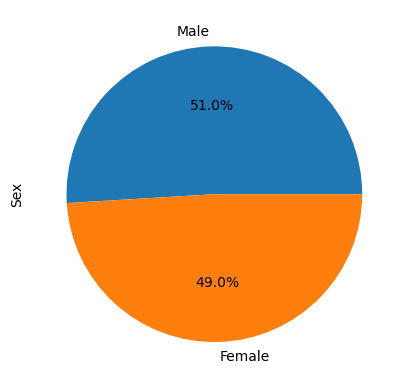

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = no_dupes_df.Sex.value_counts()
plt.pie(gender.values, labels=gender.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tumor=no_dupes_df.groupby(["Mouse ID"])["Timepoint"].max()
last_tumor=last_tumor.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_merged=last_tumor.merge(no_dupes_df, on=["Mouse ID", "Timepoint"],how="left")

In [40]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    last_tumor_vol = tumor_merged.loc[tumor_merged["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(last_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = last_tumor_vol.quantile([.25,.5,.75])
    firstq = quartiles[0.25]
    thirdq = quartiles[0.75]
    iqr = thirdq - firstq
    lower_bound = firstq - (1.5 * iqr)
    upper_bound = thirdq + (1.5 * iqr)
    
    outliers = last_tumor_vol.loc[(last_tumor_vol < lower_bound) | (last_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
    
    # Lists outliers in certain treatments. Only Infubinol had a notable outlier (much smaller than the rest)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


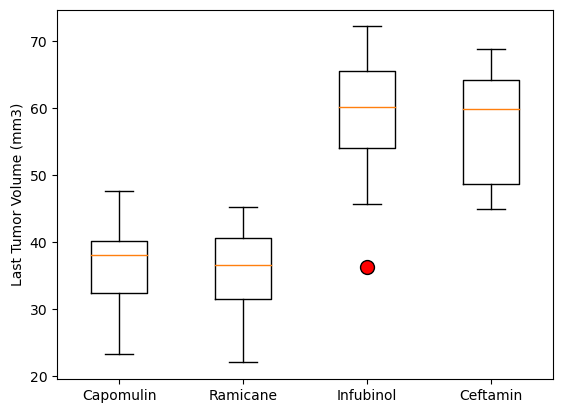

In [42]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='red', markersize=10)
plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops=orange_out)
plt.ylabel("Last Tumor Volume (mm3)")
plt.show()

# Box plot for each treatment, indicating outliers as points in red.

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse l509')

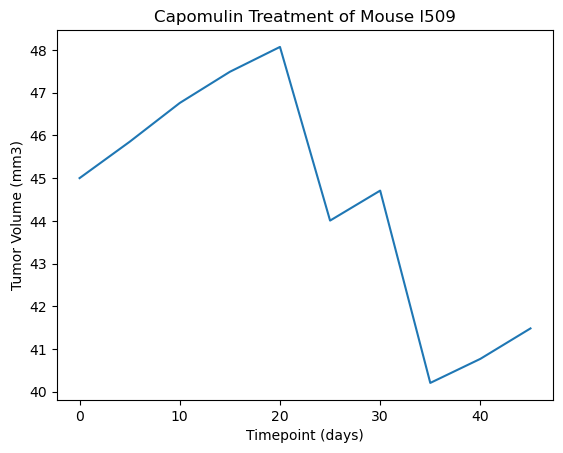

In [50]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_stats = no_dupes_df[no_dupes_df["Drug Regimen"] == "Capomulin"]
mouse_data = capomulin_stats[capomulin_stats["Mouse ID"] == "l509"]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

# Line plot showing tumor size (volume) over time (time point measured in days). Tumor seemed to shrink, which is
# most likely a desired outcome.

C:\Users\josep\AppData\Local\Temp\ipykernel_13452\1296578403.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_average = capomulin_stats.groupby(["Mouse ID"]).mean()


Text(0.5, 1.0, 'Tumor Volume vs Weight of Capomulin Treated Mice')

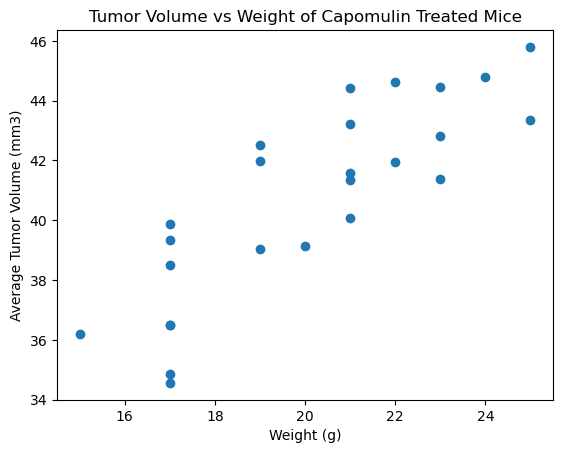

In [54]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_stats = no_dupes_df[no_dupes_df["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_stats.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Tumor Volume vs Weight of Capomulin Treated Mice")

# Scatter plot measures correlation between tumor size and weight of capomulin treated mice.
# Unsurprisingly, higher weight is associated with higher tumor volume.

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


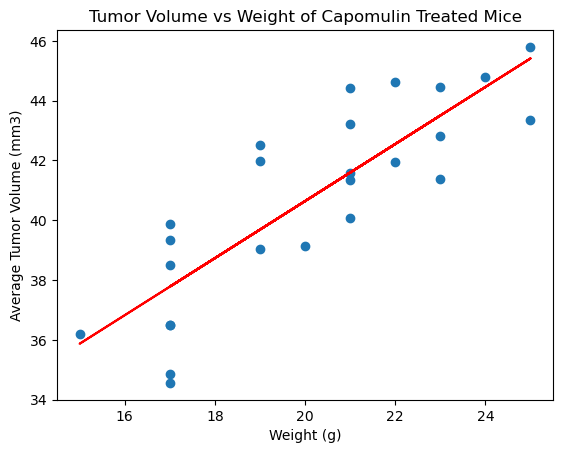

In [59]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corre = st.pearsonr(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(corre[0],2)}")

model = st.linregress(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
slope = model [0]
y_intercept = model [1]
y_values = capomulin_average["Weight (g)"] * slope + y_intercept
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Tumor Volume vs Weight of Capomulin Treated Mice")
plt.plot(capomulin_average["Weight (g)"], y_values, color="red")

# Adding a linear regression model to the scatterplot and pearson correlation coefficient.
# The linear model illustrates the association observed in the previous example.
# A pearson correlation coefficient of 0.84 indicates a strong correlation between the two factors.